# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [7]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these}
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

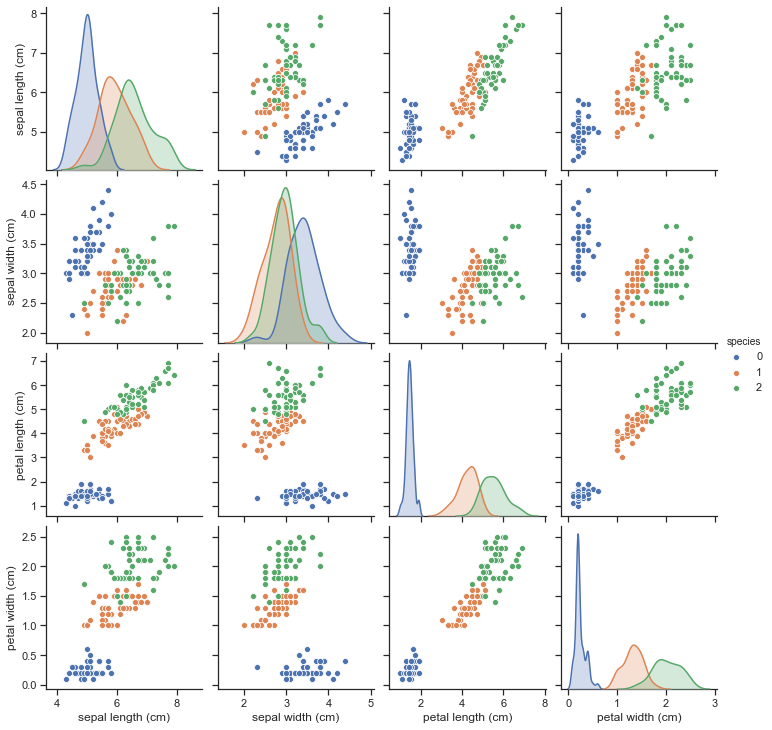

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [8]:
# define plotting function
import seaborn as sns
import matplotlib.pyplot as plt
def myplotGrid(X,y, selected_features, title= ""):
    """
    Create a pairplot using matplotlib subplots and index values of the feature data, and iterating through row and col,
    
    where row = feature rows and col = feature columns
    
    eg. axs[row,col].scatter(X[:,col], X[:,row]) will create a scatter plot in the subplot
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) 
    
    Feature data
    
    y : {array-like, sparse matrix} of shape (n_samples,)
    
    Target data
    
    selected_features : list of str
    
    Feature names of the feature data 
    
    title : str. default= ""
    
    Displays the title of the figure
    
    Returns
    -------
    Displays open figure of the subplots
    
    """
    #create subplots
    fig, axs = plt.subplots(X.shape[1], X.shape[1], figsize= (15,15))
    
    #loop through the number of features in the feature data and create the different plots using index location
    #where n = rows and m = columns in the feature data array
    for row in range(0,X.shape[1]):
        for col in range(0,X.shape[1]):
            if row == col:
                axs[row,col].hist(X[:,row], color= "coral")
                axs[row,col].set_xticklabels('')
            else:
                axs[row,col].scatter(X[:,col],X[:,row], c= y, cmap= "tab10")
                
            #label the axes
            if col == 0:
                axs[row,col].set_ylabel(selected_features[row])
            if row == 3:
                axs[row,col].set_xlabel(selected_features[col])
            
    plt.suptitle(str(title))
    plt.show()

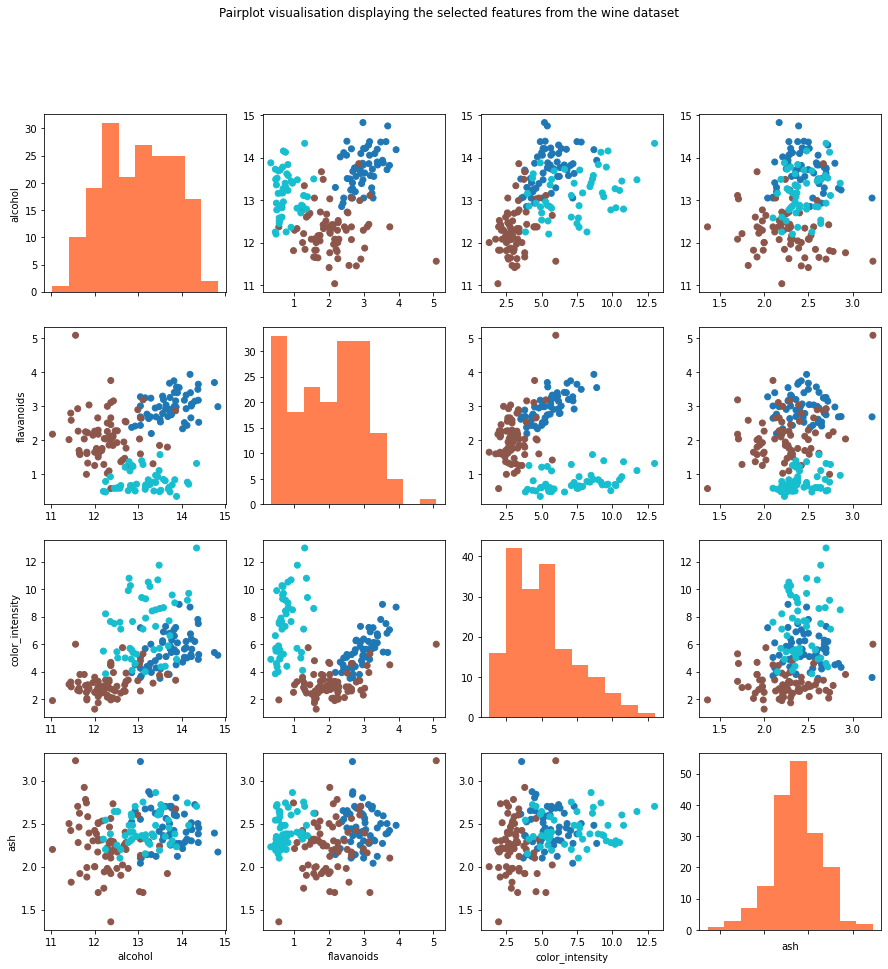

In [9]:
# run the plotting function
myplotGrid(X,y, selected_features, title= "Pairplot visualisation displaying the selected features from the wine dataset")


### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

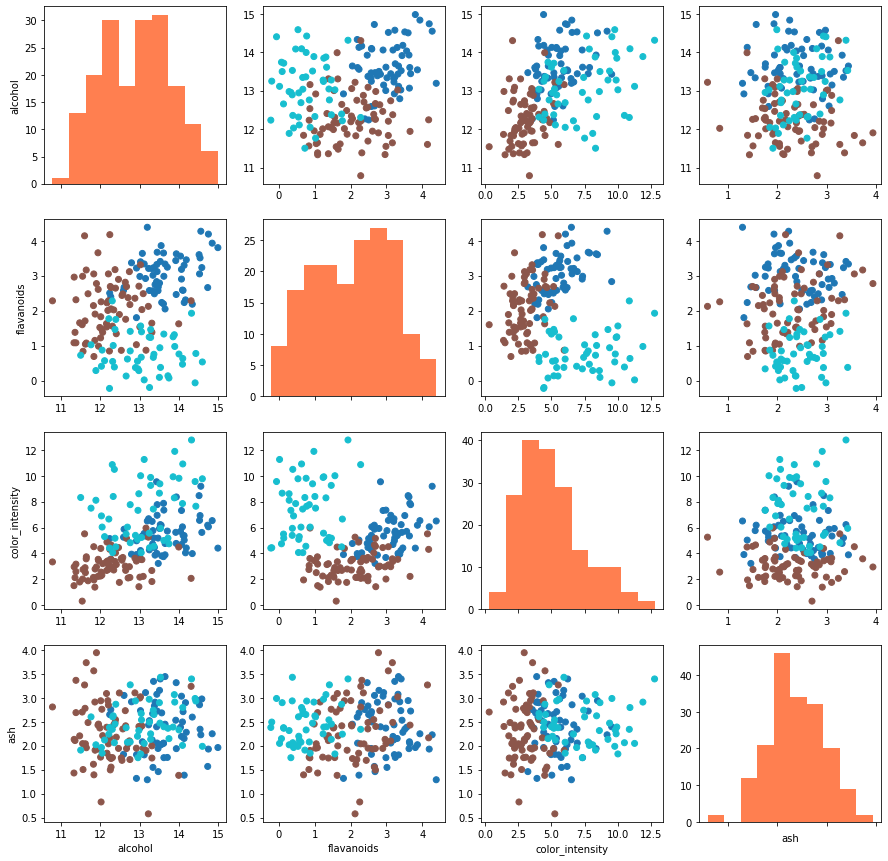

In [10]:
# noise code 
mySeed = 12345
np.random.seed(mySeed)
XN = X + np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y, selected_features)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: 

Based on the available features, it would be logical to use flavanoids and colour intensity as the two features. Where classifiers use some sort of discriminant function to separate the examples of different classes or targets (Alpaydin, 2020), a certain separation between the classes is favourable. In the pairplot without noise, target 2 has suitable separation from target 0 and 1, which would therefore establish a suitable discriminant. There is some overlap between the examples from target 0 and target 1, but a suitable discriminant could still be produced, it just may have some difficulty classifiy examples where target 0 and 1 overlap.

It is clear from the scattergraph displaying colour intensity against flavanoids, that data points that are classified as 0 has a moderate increase in colour instensity along with a moderate increase in flavanoids. Data points classified as 1 has minimal change in colour intensity as flavanoids increase and data points classified as 2 remain relatively unchanged in flavanoids as colour intensity increases.

Even with the noise included, there seems to be better discrimination between the targets in the scattergraph displaying the colour intensity and the flavanoids, although the inclusion of noise could increase the potential for more misclassification.
    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: 

With the noise, the data becomes more spurious compared to the data without noise. As stated in the previous question, classifiers learn a rule using training data by creating discriminant functions to apply predictions to novel instances. If the data is more spurious and includes noise, then it is likely a classifier will consider the noise as some sort of signal, resulting in a skewed discriminant function. Consequently, this enhances the likelihood of the misclassification of a novel instance. In certain industries, this can have a profoundly negative effect. For example, noisy data in a classifier detecting fraudulent transactions could potentially miss these fraudulent transactions if the discriminant is skewed by normal transactions that are noisy but appear as fraudulent transactions to the classifier. In this instance, it may be useful to change the discriminant function to include more false positives. For some classifiers, like k-nearest neighbours, even though their algorithms are powerful, they can be lazy and rely heavily on quality training data.



## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [11]:
# helper code
def distance_metrics(vector_1, vector_2, metric= "euclidean"):
    """
    Calculates the distance between two vectors using the stated metric.
    
    Parameters
    ----------
    vector_1 : {array-like, sparse matrix} of shape (n_samples,)
    
    First vector
    
    vector_2 : {array-like, sparse matrix} of shape (n_samples,)
    
    Second vector
    
    metric : str. default= "euclidean"
    
    The distance metric of choice for calculating the distance between two vectors. The distances that can be used are 
    "euclidean", "manhattan", and "minkowski"
    
    Returns
    -------
    distance : float
    
    Distance measurement between the two vectors
    
    """
    
    n_dimensions = len(vector_1)
    
    #establish which metric is being used and proceed with calculation
    #Both vectors must be the same length for calculation to work
    if len(vector_1) == len(vector_2):
        if metric == 'euclidean': 
            #iterate through each vector dimension and 
            distance_list = []
            for i in range(0,n_dimensions):
                distance_list.append(vector_1[i] - vector_2[i])
            total_squared_distance = np.dot(distance_list, distance_list)
            distance = total_squared_distance ** 0.5
            return distance

        elif metric == 'manhattan':
            distance = 0
            for i in range(0,n_dimensions):
                distance += abs(vector_1[i] - vector_2[i])
            return distance

        elif metric == 'minkowski':
            distance_list = []
            for i in range(n_dimensions):
                distance_list.append(abs(vector_1[i] - vector_2[i]))
            total_squared_distance = np.dot(distance_list, distance_list)
            distance = total_squared_distance ** 0.5
            return distance
    else:
        print("Cannot compute distance: both vectors must have the same number of dimensions!")
    
def nearest_n(distances_list, k, y):
    """
    Finds the k number of data points from the training data that is closest in distance to the novel data point.
    
    Parameters
    ----------
    distances_list : list
    
    A list of the distances from each vector in the training set to the novel vector
    
    k : int
    
    The number of neighbours
    
    y : {array-like, sparse matrix} of shape (n_samples,)
    
    Target data
    
    Returns
    -------
    k_nearest : list of tuples
    
    A list of the k (target values, distance) tuples nearest to novel data point
    """
    
    #create a list of tuples from the target features and the corresponding distances
    distances_tuples = list(zip(y, distances_list))
    
    #sort distances in order from nearest to furthest
    sort_by_distance = sorted(distances_tuples, key= lambda x: x[1])
    
    #get the k nearest distances
    k_nearest = list(sort_by_distance[:k])
        
    return k_nearest

def get_target(nearest_list):
    """
    Implement the k-nearest neighbour vote to determine target for novel data point
    
    Parameters
    ----------
    nearest_list : list
    
    List of nearest neighbours
    
    Returns
    -------
    winner : str
    
    The target value with the larget number of votes
    
    get_target(nearest_list[:-1]) : function
    
    The function is computed again if a solitary winning target is not established, with a neighbour with the furthest
    distance removed i.e. k is reduced until a winner is found.
    """
    
    #targets are ordered from nearest to farthest
    #create an empty dictionary to hold target counts
    vote_counts = {}
    
    #iterate through list and count targets, append counts to dictionary
    for t in nearest_list:
        vote_counts[t[0]] = vote_counts.get(t[0], 0) + 1
    
    #get most common target by ordering dictionary by value
    sort_vote_counts = dict(sorted(vote_counts.items(), key = lambda x: x[1], reverse = True))
    
    #find the target with the most counts
    winner, winner_count = list(sort_vote_counts.keys())[0], list(sort_vote_counts.values())[0]
    
    #determine how many winners there are
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    
    #return winner if there is only one, repeat function of more than one found, with a neighbour with longest distance removed
    if num_winners == 1:
        return winner
    else:
        return get_target(nearest_list[:-1])
    

In [12]:
def mykNN(X, y, X_, k=2, metric='euclidean'):
    """
    For each novel vector in the X_ array, a target value prediction is returned
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) 
    
    Feature data
    
    y : {array-like, sparse matrix} of shape (n_samples,)
    
    Target data
    
    X_ : {array-like, sparse matrix} of shape (n_samples, n_features)
    
    Novel data
    
    k: int. default= 2
    
    Number of neighbours to use in classifier
    
    metric : str. default= "euclidean"
    
    The distance metric of choice for calculating the distance between two vectors. The distances that can be used are 
    "euclidean", "manhattan", and "minkowski"
    
    Returns
    -------
    y_pred : {array-like, sparse matrix} of shape (n_samples,)
    
    An array of predicted target values for each vector in X_
    """
    #use the order of the arrays to find the nearest neighbour i.e. use vector indices
    #loop through each vector in the X_ array and find nearest neighbour(s)
    y_pred = []
    for i in range(len(X_)):
        #create a list of of distances from vector in X_ to each vector in X
        distance_to_neighbours = [distance_metrics(X_[i], x_i, metric) for x_i in X]
        
        #pass list into nearest_n function, to obtain list k nearest targets and their distances
        nearest_list = nearest_n(distance_to_neighbours, k, y)
    
        #predict the target value for X_ vector using get_target function
        y_pred.append(get_target(nearest_list))
    
    y_pred = np.array(y_pred)
    
    return y_pred

### Testing the knn function

In [13]:
# mykNN code
# provided with no X_ array to test the function so will perform train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

y_ = mykNN(X_train, y_train, X_test, k=5, metric='euclidean')
print(y_)
print(y_test)

[2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2 1]
[2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [14]:
# confusion matrix, accuracy, precision, recall, etc. 
def confusion_matrix(y_pred, y_true):
    """
    Displays a confusion matrix
    
    Parameters
    ----------
    y_pred : {array-like, sparse matrix} of shape (n_samples,)
    
    target predictions
    
    y_true : {array-like, sparse matrix} of shape (n_samples,)
    
    True target values 
    
    Returns
    -------
    confusion_matrix : ndarray of shape (n_classes, n_classes)
    
    A confusion matrix where ith row indicates the number of true labels being labelled as ith class and jth columns idicates
    the number of predicted labels being labelled as jth class.
    """
    #create an array of zeros to intialise matrix
    confusion_matrix = np.zeros((3,3), dtype=int)
    
    for j in zip(y_true, y_pred):
        confusion_matrix[j[0],j[1]] += 1
    return confusion_matrix
        

def accuracy_score(y_pred, y_true):
    """
    Computes the accuracy score to determine the percentage of predicted values correctly classified
    
    Parameters
    ----------
    y_pred : {array-like, sparse matrix} of shape (n_samples,)
    
    target predictions
    
    y_true : {array-like, sparse matrix} of shape (n_samples,)
    
    True target values 
    
    Returns
    -------
    accuracy : float
    
    The accuracy of the classifier:
    
    Accuracy = x/y, where x= number of correctly classified instances and y= total number of instances classified
    
    """
    correct_count = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            correct_count += 1
            
    accuracy = correct_count / len(y_pred)
    
    return accuracy

def precision_score(y_pred, y_true):
    """
    Computes the precision score:
    
    Precision = TP / TP + FP, where TP= True positive classifications and FP= False positive classifications
    
    Parameters
    ----------
    y_pred : {array-like, sparse matrix} of shape (n_samples,)
    
    target predictions
    
    y_true : {array-like, sparse matrix} of shape (n_samples,)
    
    True target values 
    
    Returns
    -------
    
    precision_scores : list of floats
    
    The precision score for each class/target
    """
    #use confusion matrix to calculate TP and FP
    precision_scores = [] #precision score for each target value
    C = confusion_matrix(y_pred, y_true)
    for i in range(C.shape[0]):
        TP = C[i,i]
        pos_pred = sum(C[:,i])
        precision = TP / pos_pred
        precision_scores.append(precision)
    return precision_scores

def recall(y_pred, y_true):
    """
    Computes recall(sensitivity):
    
    recall = TP / TP + FN, where TP= True positive classifications and FN= false negative classifications
    
    Parameters
    ----------
    y_pred : {array-like, sparse matrix} of shape (n_samples,)
    
    target predictions
    
    y_true : {array-like, sparse matrix} of shape (n_samples,)
    
    True target values 
    
    Returns
    -------
    
    recall_scores : list of floats
    
    The recall score for each class/target
    
    """
    #use confusion matrix to find TP and FN
    recall_scores = []
    C = confusion_matrix(y_pred, y_true)
    for i in range(C.shape[0]):
        TP = C[i,i]
        pos_instances = sum(C[i,:])
        recall = TP / pos_instances
        recall_scores.append(recall)
    return recall_scores

In [15]:
# test evaluation code
conf_mat = confusion_matrix(y_, y_test)
print(conf_mat)

acc_score = accuracy_score(y_, y_test)
print(acc_score)

precision = precision_score(y_, y_test)
print(precision)

sensitivity = recall(y_, y_test)
print(sensitivity)

[[10  0  0]
 [ 2  9  0]
 [ 0  0 15]]
0.9444444444444444
[0.8333333333333334, 1.0, 1.0]
[1.0, 0.8181818181818182, 1.0]



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [16]:
# parameters for testing code
nFolds = 4
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)
indices

[array([109,  68, 176,  55, 149,  17,  70,  93, 153, 151,  67, 112,  78,
         35,  42,  16,  89, 122, 100,  61, 175, 116, 160, 161, 125,  10,
        152, 120, 159,  40,  33,  48, 148,  24,  54,   2,  51, 121, 174,
         20, 172, 135,  52, 150,  39]),
 array([  4, 103,  28, 136, 106,  19, 117, 134,  56, 110,  98,  92,  95,
         15,  47,  73,  79,   8,  13,  99,  84,  25, 165, 102,   9,  86,
         60, 145, 141,  85, 111,  45,  69,  71, 128, 162,  65, 104, 167,
         94, 137,  37,  49,  66,   6]),
 array([147,   3,  32,  30, 155,  26, 173, 146,  44,  90,   0,  63, 139,
        156,  21, 154,  58,  46,  57,  82,  50,  18,  41,  62, 127,  22,
         76,  74, 130, 158,  96,  88,  38,  27,  80, 123,  14,  12,  83,
        166, 132, 108,   5,  72]),
 array([140,  53, 171, 144, 107, 157, 115,  75, 119, 143, 133, 124, 131,
         64,  36,  87, 163,  97,  31, 170,  23,  43,   7,  81, 138,  77,
         11, 114, 168,  91, 105, 142,  59, 113, 118,   1, 177,  34, 101,
        1

In [17]:
#helper functions

def hyperparameter_combinations(neighbours, distances):
    """
    Creates all the possible combinations of hyperparameters for tuning in each inner loop of the nested cross validation
    function
    
    Parameters
    ----------
    
    neighbours : int
    
    Number of neighbours to use for k-nearest neighbours algorithm
    
    distances : list of str
    
    A list of the different distance metrics to use in the k-nearest neighbour algorithm
    
    Returns
    -------
    
    hyperparameter_combinations : ndarray of shape ((k * len(d)), n_hyperparameters)
    
    An array for each possible hyperparameter combination, with number of rows as k * len(d), where k is the number of 
    neighbours and len(d) is the number of distance metrics in distances list. The number of columns in the array is
    n_hyperparameters, the number of hyperparameters that require tuning
    
    e.g. if k= 2 and d= ["euclidean"] :
    
    hyperparameter_combinations = [[1,"euclidean"],[2,"euclidean"]]
    """
    
    list_of_neighbours = list(range(1,neighbours+1)) #a list of the k values to test
    #array output --> [k, distance] for each row in array
    hyperparameter_combinations = np.array(np.meshgrid(list_of_neighbours, distances)).T.reshape(-1,2)
    #creates an output as follows:
    #[[k1,distance1],[k1,distance2],[k2,distance1]...etc]
    return hyperparameter_combinations

def inner_loop(f, training_fold, hyperparameter_array, X, y):
    """
    prints accuracy score for each hyperparameter combination used in the inner loop, and picks the best combination to use 
    in the outer loop
    
    Parameters
    ----------
    f : int
    
    integer index value used to extract the validation fold of the inner loop
    
    training_fold: ndarray of shape (n_folds, n_indexes)
    
    The training folds in which the algorithm will be trained on. These contain the index values pertaining to the 
    corresponding data point in the training data
    
    hyperparameter_array : ndarray 
    
    An input array of all of the different hyperparameter combinations
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features) 
    
    Feature data
    
    y : {array-like, sparse matrix} of shape (n_samples,)
    
    Target data
    
    Returns
    -------
    
    accuracies : list of floats

    Returns a list with accuracy score for each model (each model has a different combination of hyperparameters)
    """
    #get validation fold
    validation_fold = training_fold[f]
    
    #get training folds for the inner loop 
    inner_training_fold = np.delete(training_fold, f) #removes the validation fold at f index from inner training fold
    
    #combine the folds of the inner_training_fold array into 1D array
    inner_training_fold_combined = np.array([])
    for arr in inner_training_fold:
        inner_training_fold_combined = np.concatenate((inner_training_fold_combined, arr))
    inner_training_fold_combined = inner_training_fold_combined.astype(int)

    accuracies = [] #accuracies for each model appended here

    #using the inner_training_fold_combined indices to train model, classify validation set using all possible parameter
    #combinations (parameter_array)
    for p in hyperparameter_array:
        y_ = mykNN(X[inner_training_fold_combined], y[inner_training_fold_combined], X[validation_fold], k=int(p[0]), \
                   metric=p[1])

        accuracies.append(accuracy_score(y_, y[validation_fold]))
        
    return accuracies

In [18]:
# myNestedCrossVal code
def myNestedCrossVal(X, y, folds=5, neighbours_range=10, distances= ['euclidean'], mySeed=12345):
    """
    Performs a nested cross validation for k-nearest neighbours function
    
    Parameters
    ----------
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features) 
    
    Feature data
    
    y : {array-like, sparse matrix} of shape (n_samples,)
    
    Target data
    
    folds : int. default= 5
    
    The number of folds to use in the outer and inner folds
    
    neighbours_range : int. default= 10
    
    The number of neighbours to use in the nested cross validation
    
    distances : list of str. default= "euclidean"
    
    The distance metrics to use in the function. The distances that can be used are "euclidean", "manhattan", and "minkowski"
    
    mySeed : int. default= 12345
    
    Generates a reproducible sequence of pseudo random numbers
    
    Returns
    -------
    
    confusion_matrices : ndarray of shape (n_classes, n_classes)
    
    Returns a confusion matrix for each iteration of the outer fold
    """
    
    #create an array of random permutation of indices and split into folds
    np.random.seed(mySeed)
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, folds) 
    
    #create array of hyperparameter combinations to use for inner loop
    hyperparameter_array = hyperparameter_combinations(neighbours_range, distances)
    
    #save the parameter and the different accuracy scores for outer folds into two separate lists
    outer_parameters = [] #parameters chosen from each inner loop for testing in outer loop
    outer_loop_acc_scores = [] #this is the score over the k folds in the outer loop
    confusion_matrices = [] #append confusion matrix from each outer loop to this list 
    
    #iterate through the folds to give the outer folds 
    for fold in range(0,folds):
         
        test_fold = indices[fold] #obtain the test fold
        print('new iterration')

        training_fold = np.delete(indices, fold) #removes the test fold from the training fold
        
        #combine the folds of the training_fold array into 1D array
        training_fold_combined = np.array([]) 
        for arr in training_fold:
            training_fold_combined = np.concatenate((training_fold_combined, arr))
        training_fold_combined = training_fold_combined.astype(int)
        
        array_parameter = hyperparameter_array #this array will be used to concatenate the accuracies for fold
        
        #iterate through the inner loop and find the best parameters
        for f in range(0,len(training_fold)):
            
            #produce a list of accuracies for each model
            accuracies = inner_loop(f, training_fold, hyperparameter_array, X, y) 
            
            #combine the accuracies with the hyperparameter combinations
            array_parameter = np.column_stack((array_parameter,accuracies))
            
        #calculate the average accuracy for each model across the folds 
        average_scores = []
        for row in array_parameter:
            average_score = np.mean(row[2:].astype(float))
            average_scores.append(average_score)
        
        #print accuracy per distinct set of parameters on the validation set
        for row in array_parameter:
            print("Parameters: " + "K= " + row[0] + ", DM= " + row[1])
            val_scores = [r for r in row[2:]]
            for s in val_scores:
                print("Score against validation set:",s)
        
        #pick the model with highest average
        max_accuracy = max(average_scores)
        index_max_accuracy = average_scores.index(max_accuracy)
        
        best_parameters = hyperparameter_array[index_max_accuracy] #use these parameters to train the model on the test set
        
        print("Model parameters with the highest accuracy: K= " + best_parameters[0] + ", distance measure = " +\
              best_parameters[1])
        print("Average accuracy score for chosen model: " + str(max_accuracy))
        
        #train model with new parameters on the training fold and test on the test fold
        y_ = mykNN(X[training_fold_combined], y[training_fold_combined], X[test_fold], k=int(best_parameters[0]), \
                   metric=best_parameters[1])
        
        #append accuracy and parameters for fold
        fold_accuracy = accuracy_score(y_, y[test_fold])
        outer_loop_acc_scores.append(fold_accuracy)
        
        outer_parameters.append(best_parameters)
        
        #print the confusion matrix for each fold
        conf_mat = confusion_matrix(y_, y[test_fold])
        confusion_matrices.append(conf_mat)
        print("Confusion matrix for fold "+str(fold+1)+": ")
        print(conf_mat)
        print()
        print("Accuracy score for fold " + str(fold+1) + ": " + str(fold_accuracy))
        print()
        
    print("Average accuracy score across all of the outer folds: " + str(np.mean(outer_loop_acc_scores)))
    print("Standard deviation: " + (str(np.std(outer_loop_acc_scores))))
    return(confusion_matrices)         


In [19]:
# evaluate clean data code
test_clean_code = myNestedCrossVal(X, y, distances=["euclidean", "manhattan"])

new iterration


C:\Users\jimma\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Parameters: K= 1, DM= euclidean
Score against validation set: 0.9166666666666666
Score against validation set: 0.9444444444444444
Score against validation set: 0.8285714285714286
Score against validation set: 0.9428571428571428
Parameters: K= 1, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9166666666666666
Score against validation set: 0.8
Score against validation set: 0.9714285714285714
Parameters: K= 2, DM= euclidean
Score against validation set: 0.9166666666666666
Score against validation set: 0.9444444444444444
Score against validation set: 0.8285714285714286
Score against validation set: 0.9428571428571428
Parameters: K= 2, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9166666666666666
Score against validation set: 0.8
Score against validation set: 0.9714285714285714
Parameters: K= 3, DM= euclidean
Score against validation set: 0.9444444444444444
Score against validation set: 0.94444

Parameters: K= 1, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.9428571428571428
Parameters: K= 1, DM= manhattan
Score against validation set: 0.9722222222222222
Score against validation set: 0.9166666666666666
Score against validation set: 0.8571428571428571
Score against validation set: 0.9714285714285714
Parameters: K= 2, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.9428571428571428
Parameters: K= 2, DM= manhattan
Score against validation set: 0.9722222222222222
Score against validation set: 0.9166666666666666
Score against validation set: 0.8571428571428571
Score against validation set: 0.9714285714285714
Parameters: K= 3, DM= euclidean
Score against validation set: 0.9722222222222222
Score a

Parameters: K= 1, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9428571428571428
Parameters: K= 1, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9142857142857143
Parameters: K= 2, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9428571428571428
Parameters: K= 2, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9444444444444444
Score against validation set: 0.9142857142857143
Parameters: K= 3, DM= euclidean
Score against validation set: 0.9722222222222222
Score a

In [20]:
# evaluate noisy  data code
test_noisy_code = myNestedCrossVal(XN, y, distances=["euclidean", "manhattan"])

new iterration
Parameters: K= 1, DM= euclidean
Score against validation set: 0.8611111111111112
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.8857142857142857
Parameters: K= 1, DM= manhattan
Score against validation set: 0.8888888888888888
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.8857142857142857
Parameters: K= 2, DM= euclidean
Score against validation set: 0.8611111111111112
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.8857142857142857
Parameters: K= 2, DM= manhattan
Score against validation set: 0.8888888888888888
Score against validation set: 0.9166666666666666
Score against validation set: 0.9142857142857143
Score against validation set: 0.8857142857142857
Parameters: K= 3, DM= euclidean
Score against validation set: 0.888888888

Parameters: K= 1, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.8611111111111112
Score against validation set: 0.8
Score against validation set: 0.9142857142857143
Parameters: K= 1, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9166666666666666
Score against validation set: 0.8285714285714286
Score against validation set: 0.9142857142857143
Parameters: K= 2, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.8611111111111112
Score against validation set: 0.8
Score against validation set: 0.9142857142857143
Parameters: K= 2, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.9166666666666666
Score against validation set: 0.8285714285714286
Score against validation set: 0.9142857142857143
Parameters: K= 3, DM= euclidean
Score against validation set: 0.9722222222222222
Score against validation set: 0.83333

Parameters: K= 1, DM= euclidean
Score against validation set: 0.9444444444444444
Score against validation set: 0.8333333333333334
Score against validation set: 0.8333333333333334
Score against validation set: 0.8571428571428571
Parameters: K= 1, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.8888888888888888
Score against validation set: 0.8333333333333334
Score against validation set: 0.8285714285714286
Parameters: K= 2, DM= euclidean
Score against validation set: 0.9444444444444444
Score against validation set: 0.8333333333333334
Score against validation set: 0.8333333333333334
Score against validation set: 0.8571428571428571
Parameters: K= 2, DM= manhattan
Score against validation set: 0.9444444444444444
Score against validation set: 0.8888888888888888
Score against validation set: 0.8333333333333334
Score against validation set: 0.8285714285714286
Parameters: K= 3, DM= euclidean
Score against validation set: 0.9722222222222222
Score a

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 97.22  |  3 | manhattan  |
| 2 | 94.44  |  3 | manhattan  |
| 3 | 91.67  |  3 | manhattan  |
| 4 | 88.57  |  5 | euclidean  |
| 5 | 94.29  |  1 | euclidean  |
| **total** | 93.24 $\pm$ 2.92 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 97.22  |  5 | manhattan  |
| 2 | 86.11  |  5 | manhattan  |
| 3 | 88.89  |  5 | manhattan  |
| 4 | 85.71  |  7 | euclidean  |
| 5 | 94.29  |  3 | manhattan  |
| **total** | 90.44 $\pm$ 4.57 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [135]:
print('CLEAN')
# clean data summary results
print(test_clean_code)
print(sum(test_clean_code))
        
print('NOISY')
# clean data summary results
print(test_noisy_code)
print(sum(test_noisy_code))

CLEAN
[array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]]), array([[14,  0,  0],
       [ 2, 13,  0],
       [ 0,  0,  7]]), array([[13,  0,  0],
       [ 3,  8,  0],
       [ 0,  0, 12]]), array([[11,  0,  0],
       [ 3, 12,  1],
       [ 0,  0,  8]]), array([[ 9,  0,  0],
       [ 1, 14,  0],
       [ 0,  1, 10]])]
[[59  0  0]
 [ 9 60  2]
 [ 0  1 47]]
NOISY
[array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]]), array([[12,  2,  0],
       [ 2, 12,  1],
       [ 0,  0,  7]]), array([[11,  1,  1],
       [ 1, 10,  0],
       [ 0,  1, 11]]), array([[ 9,  2,  0],
       [ 3, 13,  0],
       [ 0,  0,  8]]), array([[ 8,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 11]])]
[[52  6  1]
 [ 7 62  2]
 [ 0  1 47]]


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

When the noise is added to the data, the number of neighbours (k) being used in the outer loop increases. For example, in the first fold, a k value of 3 is used on the test set, whereas this k value increases to 5 when the noise is introduced. There seems to be a logic to this discovery: although more computationally expensive, a higher k value will reduce the effect of noise on the classifier, although the decision boundary will be less distinct compared with a lower k value (scikit-learn developers, 2021). The reduced distinction in the decision boundaries can be supported by a general reduction in the accuracy at folds where the value of k is higher. A useful approach for finding a useful value for k is with the formula:
\begin{equation}
k = \sqrt{n} 
\end{equation}

where n is the number of samples in the data set (Kumar A. 2020).

It appears to be that the manhattan distance metric is favoured during the validation folds and therefore produced a better average accuracy accross the inner folds. This applies to the nested cross validation for both the noisy and normal data. However, this could be unique to the data set being used as euclidean distance metric may perform better on other data sets.

Therefore, it can be asserted that the noisy data has a greater impact on the selection of k than the distance metric, but it would be worth exploring more distance metrics than just the two.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

There are a few ways in which breaking the tie can be done. One way is to pick the winner from the winners at random. Another method would be weigh the votes by distance and use these weights to pick the winner. A simple way of breaking the tie would be to try and prevent the tie breaker in the first place by selecting an odd k value. The final method, which is the method that I used in my knn function, is to reduce the value of k until a winner is found. This means that in the k number of nearest neighbours, the data point furthest away is removed and the winner re-evaluated. The pseudocode for this is as follows:

    function: tiebreak(input) --> list((class, distance)): #list of tuples
        #assumes that the list of targets is in order of distance from nearest to highest
        #count the number of each class in the list and produce a dictionary
        SET vote_counts to DICT 
        
        FOR class, distance in input:
            SET vote_counts[class] to GET VALUE AT vote_counts[class] and ADD 1 
        
        #find the most common class
        SET winner to SORTED vote_counts KEYS[0] #first value in the keys
        SET winner_count to SORTED vote_counts VALUES[0] #first value in the values
        
        #determine number of winners
        SET number_of_winners to length of list(append count on number_of_winners IF count EQUALS winner_count)
        
        #return winner if there is only one, else run function again with longest distance removed
        IF number_of_winners EQUALS 1
            OUTPUT winner
        ELSE
            RUN tiebreak(input[from index 0 to index n-1])
        

This pseudocode a rudimentary approach and makes an assumption about the input data, based on the input data in the function used as the tie break in my knn function. The function determines how many winners there are after the number of votes have been tallied for each class. If there is only one winner, then that winner is displayed as the output but if there is more than one winner, then the function is run again but this new iteration in the function reduces the length of the input list be 1, removing the longest distance and the class label attached to that distance (Grus J, 2019).

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

The results from the code implemented above emphasises that the number of neighbours (k) is to chosen carefully when implementing knn on a dataset, and data analysis can help in the selection of features although care should be taken in this manual feature selection to avoid subjectivity and potential overfitting. 

The knn algorithm can be very sensitive to feature scales, and this hasn't been considered in the coursework dataset, so this would be a good topic to explore. Features with a higher scale produce higher distances compared to features with lower scales e.g. house prices in thousands of pounds and the area of a property in square foot would produce vastly different scales where the area of the property would have a greater impact on the classifer. In instances like these, normalising or standardising the data should be heavily considered.  

Class imbalance would need to be taken into consideration with data where a class is under-represented with the number of instances. This can be a common theme in the medical industry when detecting rare diseases. When there are tens of instances for one class but thousands of instances for another class, there can be an emphasis on classifying every novel instance as the majority class. However, this can be dependent on how noisy the data is and how well the two classes are partitioned. Oversampling the the minority class with new instances or undersampling the majority class by removing instances at random can reduce this imbalance but this comes at the cost in the potential loss of information when undersampling. SMOTE is a method for oversampling that considers the feature space of the minority class and not just the specific location of the instances (Chawla N.V et al, 2002).

There is some variation in the way classifications regard the evaluation of their results, based on the aim of the classification. For example, in the breast cancer dataset, where it is important not to miss a cancer diagnosis, there will be more effort to reduce the number of false negative results and increase the number of false positive i.e. having the recall score as high as possible. Therefore, the code above would be changed to measure the highest recall scores in the inner loops of the nested cross validation function before measuring the recall scores in each of the outer folds. Choosing the hyperparameters that have a recall score of 1.0 and no less would be the most effective in not missing cancer diagnoses. 

### References

- Alpaydin, E. (2020) Introduction to Machine Learning. 4th edition. Cambridge, Massachusetts: The MIT Press, pp. 4-5
- Chawla N.V, Bowyer K.W, Hall L.O, Kegelmeyer W.P. (2002)	SMOTE: Synthetic Minority Over-sampling Technique. Journal Of Artificial Intelligence Research, 16, pp. 321-357.
- Grus J. (2019) Data Science from Scratch: First Principles with Python. 2nd edition. California: O'Reilly Media, 166-167.
- Kumar A. (2020) KNN Algorithm: When? Why? How?. Available at: https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f
- Scikit-learn developers. (2021) Nearest Neighbors. Available from: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification